In [1]:
import pandas as pd
from datautil import *
from plot import *
languages = ['python', 'java', 'js']

In [2]:
print('ungrouped')
for language in languages:
    mig_commit_num, mig_repo_num, mig_repo_prop, mig_pattern_num = get_migration(language, group=False)
    print(f'{language}:\t', end='')
    print('{} migration commits, {} migration projects({:.2f}%), {} migration_patterns'.format(mig_commit_num, mig_repo_num, mig_repo_prop, mig_pattern_num))

print('\ngrouped')
for language in languages:
    mig_commit_num, mig_repo_num, mig_repo_prop, mig_pattern_num = get_migration(language, group=True)
    print(f'{language}:\t', end='')
    print('{} migration commits, {} migration projects({:.2f}%), {} migration_patterns'.format(mig_commit_num, mig_repo_num, mig_repo_prop, mig_pattern_num))


ungrouped
python:	7642 migration commits, 4409 migration projects(3.66%), 794 migration_patterns
java:	20099 migration commits, 3795 migration projects(15.01%), 2851 migration_patterns
js:	5926 migration commits, 1432 migration projects(4.51%), 1032 migration_patterns

grouped
python:	5805 migration commits, 3880 migration projects(3.22%), 640 migration_patterns
java:	2938 migration commits, 1587 migration projects(6.28%), 390 migration_patterns
js:	1526 migration commits, 819 migration projects(2.58%), 257 migration_patterns


In [3]:
import pandas as pd
from datautil import *
# 2005-2021年的mig commit和project数量变化

project_nums_ungrouped = {}
commit_nums_ungrouped = {}
project_nums_grouped = {}
commit_nums_grouped = {}
for language in languages:
    project_nums_ungrouped[language] = get_project_num_evo(language, False)
    commit_nums_ungrouped[language] = get_commit_num_evo(language, False)
    project_nums_grouped[language] = get_project_num_evo(language, True)
    commit_nums_grouped[language] = get_commit_num_evo(language, True)

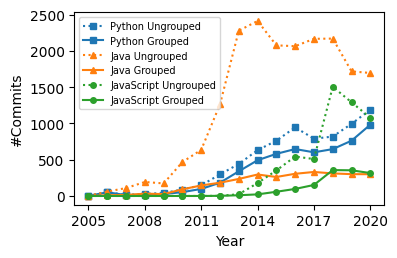

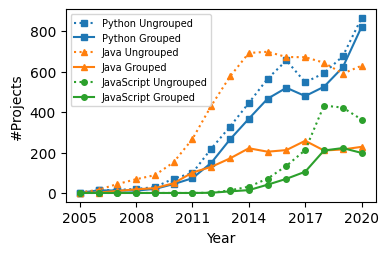

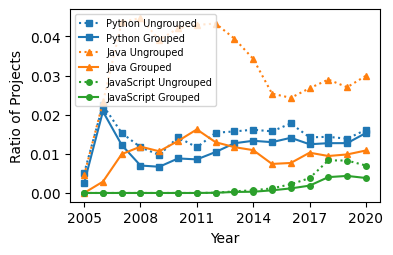

In [4]:
import numpy as np
import os

if not os.path.exists('pic'):
    os.makedirs('pic')
year = np.arange(2005, 2021)
draw_migration_evo(year, [commit_nums_ungrouped, commit_nums_grouped], 'total_migration_num', '#Commits')
draw_migration_evo(year, [project_nums_ungrouped, project_nums_grouped], 'project_migration_num', '#Projects')
draw_migration_evo(year, [project_nums_ungrouped, project_nums_grouped], 'project_migration_prop', 'Ratio of Projects', True)

In [5]:
for language in languages:
    print(f'cal {language}')
    for group in [False, True]:
        cal_mig_per_project(language, group)

cal python
cal java
cal js


In [6]:
def draw_box_plot(mig_per_project, mig_per_project_per_year):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 2))
    bplot1 = axes[0].boxplot(mig_per_project, showfliers=False, showmeans=True, meanline=False, patch_artist=True, widths=[0.85] * 6, medianprops={
                             'color': 'black'}, meanprops={'markeredgecolor': 'black', 'markerfacecolor': 'black', 'markersize': 2})                                   # 绘图
    axes[0].set_xlim([0, 7])
    axes[0].set_ylim([0, 6])
    axes[0].set_xticks([1.5, 3.5, 5.5])
    axes[0].set_yticks(np.arange(0, 7, 2))
    axes[0].set_xlabel("Language")
    axes[0].set_ylabel("#Migrations in Total")
    axes[0].set_xticklabels(['Java', 'JavaScript', 'Python'],
                            rotation=0, fontsize=8)
    red_patch = mpatches.Patch(color='tab:blue', label='Ungrouped Dataset')
    green_patch = mpatches.Patch(color='#95d0fc', label='Grouped Dataset')
    axes[0].legend(handles=[red_patch, green_patch], fontsize=5)
    box_colors = ['tab:blue', '#95d0fc'] * 3
    for patch, color in zip(bplot1['boxes'], box_colors):
        patch.set_facecolor(color)

    bplot2 = axes[1].boxplot(mig_per_project_per_year, showfliers=False, showmeans=True, meanline=False, patch_artist=True, widths=[0.85] * 6, medianprops={
                             'color': 'black'}, meanprops={'markeredgecolor': 'black', 'markerfacecolor': 'black', 'markersize': 2})                                   # 绘图

    axes[1].set_xlim([0, 7])
    axes[1].set_ylim([0, 1.5])
    axes[1].set_xticks([1.5, 3.5, 5.5])
    axes[1].set_yticks(np.arange(0, 1.8, 0.5))
    axes[1].set_xlabel("Language") 
    axes[1].set_ylabel("#Migrations per Year")
    axes[1].set_xticklabels(['Java', 'JavaScript', 'Python'],
                            rotation=0, fontsize=8) 
    red_patch = mpatches.Patch(color='tab:blue', label='Ungrouped Dataset')
    green_patch = mpatches.Patch(color='#95d0fc', label='Grouped Dataset')
    axes[1].legend(handles=[red_patch, green_patch], fontsize=5)
    for patch, color in zip(bplot2['boxes'], box_colors):
        patch.set_facecolor(color)

    plt.subplots_adjust(left=0.1,
                        bottom=0.15,
                        right=0.9,
                        top=0.85,
                        wspace=0.3,
                        hspace=0.35)

    plt.savefig("pic/box_plot.pdf", bbox_inches="tight")
    plt.show()

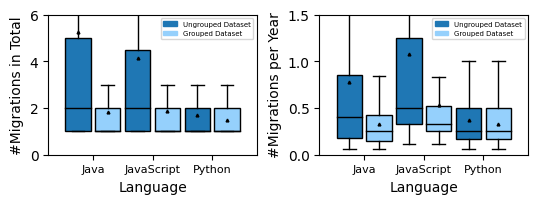

In [7]:
import pandas as pd

mig_per_project = []
mig_per_project_per_year = []
for language in ['java', 'js', 'python']:
    mig_per_project_per_year.append(pd.read_csv(f'temp/{language}_mig_per_project_per_year_ungrouped.csv')['num'].values)
    mig_per_project_per_year.append(pd.read_csv(f'temp/{language}_mig_per_project_per_year_grouped.csv')['num'].values)
    mig_per_project.append(pd.read_csv(f'temp/{language}_mig_per_project_ungrouped.csv')['num'].values)
    mig_per_project.append(pd.read_csv(f'temp/{language}_mig_per_project_grouped.csv')['num'].values)


draw_box_plot(mig_per_project, mig_per_project_per_year)

In [8]:
print('per year')
languages = ['java', 'js', 'python']
percentiles = np.array([2.5, 25, 50, 75, 97.5])
for i in range(0, 3):
    print(languages[i])
    for j in range(0, 2):
        ptiles_vers = np.percentile(mig_per_project_per_year[i * 2 + j], percentiles)
        print(ptiles_vers)

per year
java
[0.09090909 0.1780303  0.4        0.85714286 3.75      ]
[0.08731061 0.14285714 0.25       0.42857143 1.        ]
js
[0.14285714 0.33333333 0.5        1.25       5.40142857]
[0.14285714 0.25       0.33333333 0.525      1.75      ]
python
[0.09090909 0.16666667 0.25       0.5        1.33333333]
[0.1        0.16666667 0.25       0.5        1.        ]
